In [1]:
import os
import numpy as np
from collections import defaultdict
import jsonlines

In [2]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib ipympl

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipympl

ModuleNotFoundError: No module named 'ipympl'

In [3]:
def load_or_make_hist(d):
    if not os.path.isdir(d):
        raise Exception('%s is not a valid directory' % d)
    f = os.path.join(d, HIST_FNAME)
    if os.path.isfile(f):
        return np.load(f, allow_pickle=True).item()
    else:
        return defaultdict(dict)

In [4]:
def no_zeros(t,x):
    t = np.array(t)
    x = np.array(x)
    mask = x != 0
    return t[mask], x[mask]

In [5]:
mydirs = "test102819 test1001credo3"
outf = "/scratch0/ilya/locDoc/ACGAN/experiments"

In [6]:
def dir_to_series(mydir):
    """
    Define outf as a global.
    """

    hist = load_or_make_hist(os.path.join(outf, mydir))
    
    def safe_get(v):
        retme = []
        if 'IS' in v:
            retme.append(v['IS'][0])
        else:
            retme.append(0)
        if 'FID' in v:
            retme.append(v['FID'])
        else:
            retme.append(0)
        return retme
            

    t, IS, Acc = list(zip(*sorted([(k, safe_get(v)[0], safe_get(v)[1]) for (k, v) in hist.items()])))
    npAcc = np.array(Acc)
    npIS = np.array(IS)
    npt = np.array(t)
    IS = npIS[npt <= 100000]
    t = npt[npt <= 100000]
    Acc = npAcc[npt <= 100000]
    return t, IS, Acc


In [7]:
def dir_tpo_acc_series_jsonl(mydir, fixtrain=1):
    fpath = os.path.join(outf, '%s_log.jsonl' % mydir)
    with jsonlines.open(fpath) as reader:
        all_records = []
        for obj in reader:
            all_records.append((obj['itr'],obj['train_accuracy'],obj['test_accuracy'],obj['self_accuracy'],0.0))
    t, train, test, self_, generator = list(zip(*sorted(all_records)))
    t = np.array(t)
    train = np.array(train) / fixtrain
    test = np.array(test)
    self_ = np.array(self_)
    generator = np.array(generator)
    return t, train, test, self_, generator

In [8]:
def dir_to_acc_series(mydir):
    """
    Define outf as a global.
    """

    hist = load_or_make_hist(os.path.join(outf, mydir))
    
    def safe_get(v):
        retme = []
        def key_or_0(k):
            if k in v:
                retme.append(v[k])
            else:
                retme.append(0)
        key_or_0('Train')
        key_or_0('Test')
        key_or_0('Self')
        key_or_0('Generator')
        return tuple(retme)
            

    t, train, test, self_, generator = list(zip(*sorted([(k,) + safe_get(v) for (k, v) in hist.items()])))
    t = np.array(t)
    train = np.array(train)
    test = np.array(test)
    self_ = np.array(self_)
    generator = np.array(generator)
    return t, train, test, self_, generator

In [9]:
def dir_to_mean_label_series(mydir, nclass=10):
    """
    Define outf as a global.
    """

    hist = load_or_make_hist(os.path.join(outf, mydir))
    
    def safe_get(v):
        retme = [0] * nclass
        if 'Mean_Label' in v:
            retme = (v['Mean_Label'])


        return retme
            

    t, arr = list(zip(*sorted([(k,) + (safe_get(v),) for (k, v) in hist.items()])))
    t = np.array(t)
    arr = np.array(arr)
    return t, arr

In [9]:
mydirs = "celeba5c_marygan celeba5c_acgan celeba_vanillagan" # celebaMF_marygan

In [10]:
mydirs = "default mh_loss_noconcat_gap mh_loss_noconcat_gap_phase2_4 mhs_p05 fmloss"
outf = "/scratch0/ilya/locDoc/BigGAN/cifartest"
#mh_loss_concat_gap mh_loss_concat_gap_resamp  mh_loss_noconcat_gap_phase2_2 mh_loss_noconcat_gap_phase2_3
# for cifar10

In [142]:
mydirs = "mh_noconcat_2 mh_noconcat_baseline mh_noconcat_4step mh_noconcat_2_Glr2"
outf = "/scratch0/ilya/locDoc/BigGAN/Imagenet64"
# for 64x64 imagenet

In [30]:
mydirs = "cifar100_mh cifar100_fm_and_cs_p05 cifar100_baseline_redo cifar100_fmloss"
mydirs = "cifar100_fm_and_cs_p05 cifar100_fm_and_cs_p01"
# cifar100_mh_ema20k cifar100_mh cifar100_mh_phase2_3 cifar100_baseline_redo cifar100_fmloss cifar100_actual_baseline
outf = "/scratch0/ilya/locDoc/BigGAN/cifartest"
outf = "/fs/vulcan-scratch/ilyak/locDoc/experiments/cifar100/"
# for cifar100

In [541]:
mydirs = "mhs_p05_32px stl32_with_unlab stl32_baseline_prjdisc stl32_with_unlab_improve stl32_with_fmloss stl32_with_fmloss_too stl32_with_unlab_improve_1step"
#mydirs = "stl32_with_unlab_improve_1step"
outf = "/scratch0/ilya/locDoc/BigGAN/stl"
# for stl 32

In [548]:
mydirs = "mh_48px_baseline mh_48px_fmloss mhs_p05_48px mh_48px_unlab_like64_improve_2"
#mydirs = 'mh_48px_fmloss'
# mh_48px_unlab_simpler mh_48px_unlab_simpler_reallyaugment
# mh_48px_unlab_like64 mh_48px_unlab_like64_improve mh_48px_unlab_like64_improve_2 mh_48px_fmloss mh_48px_fmloss_bs64 mh_48px_fmloss_bs256 
outf = "/scratch0/ilya/locDoc/BigGAN/stl"
# for stl 48

In [17]:
mydirs = "mhinge_p1 mhinge_p1_2step baseline_2step_128bs"
outf = "/fs/vulcan-scratch/ilyak/locDoc/experiments/TinyImagenet_100k"
# for tiny-imagenet

In [87]:
mydirs = "mhinge_p1_2step tih_mhinge_p05_2step tih50k_mhinge_p025_2step tih50k_mhinge_p05_2step_Dlr2" 
outf = "/fs/vulcan-scratch/ilyak/locDoc/experiments/TinyImagenet_100k"
# for tiny-imagenet-half even

In [10]:
# make ICML CIFAR10 supplemental material multiple runs charts
mydirs = 'baseline_redo_feb1 baseline_redo_feb2 baseline_redo_feb3 baseline_redo_feb4 baseline_redo_feb5'
mydirs += ' mhs_p05_redofeb1 mhs_p05_redofeb2 mhs_p05_redofeb3 mhs_p05_redofeb4 mhs_p05_redofeb5'
mynames = 'Baseline T1,Baseline T2,Baseline T3,Baseline T4,Baseline T5,MHingeGAN T1,MHingeGAN T2,MHingeGAN T3,MHingeGAN T4,MHingeGAN T5'
outf = '/scratch0/ilya/locDoc/BigGAN/cifar10'

In [13]:
# make ICML CIFAR100 supplemental material multiple runs charts
mydirs = 'cifar100_baseline_redo_feb1 cifar100_baseline_redo_feb2 cifar100_baseline_redo_feb3 cifar100_baseline_redo_feb4 cifar100_baseline_redo_feb5'
mydirs += ' c100_mh_p05_redo_feb1 c100_mh_p05_redo_feb2 c100_mh_p05_redo_feb3 c100_mh_p05_redo_feb4 c100_mh_p05_redo_feb5'
mynames = 'Baseline T1,Baseline T2,Baseline T3,Baseline T4,Baseline T5,MHingeGAN T1,MHingeGAN T2,MHingeGAN T3,MHingeGAN T4,MHingeGAN T5'
outf = '/scratch0/ilya/locDoc/BigGAN/cifar100'

In [52]:
# make ICML CIFAR100 supplemental material multiple runs charts
mydirs = 'cifar100_baseline_redo_feb1 cifar100_baseline_redo_feb2 cifar100_baseline_redo_feb3 cifar100_baseline_redo_feb4 cifar100_baseline_redo_feb5'
mydirs += ' c100_mh_p05_redo_feb2_ctd_c c100_mh_p05_redo_feb2'
mynames = 'Baseline T1,Baseline T2,Baseline T3,Baseline T4,Baseline T5,MHingeGAN'
outf = '/scratch0/ilya/locDoc/BigGAN/cifar100'

In [14]:
HIST_FNAME = 'scoring_hist.npy'

mydirs_ = mydirs.split(' ')
mynames_ = mynames.split(',')
full_paths = [os.path.join(outf, d) for d in mydirs_]
hists = [load_or_make_hist(d) for d in full_paths]

cifar100_baseline_redo_feb1 @ 97500
{'IS': [10.871011, 0.16130468], 'FID': 10.52229674740056}
cifar100_baseline_redo_feb2 @ 97500
{'IS': [10.878706, 0.12942174], 'FID': 10.412228471226854}
cifar100_baseline_redo_feb3 @ 97500
{'IS': [10.831228, 0.15103668], 'FID': 10.716435182853047}
cifar100_baseline_redo_feb4 @ 97500
{'IS': [11.038257, 0.13277292], 'FID': 10.51492636686504}
cifar100_baseline_redo_feb5 @ 75000
{'IS': [10.8328285, 0.18673599], 'FID': 10.53053305880212}
c100_mh_p05_redo_feb1 @ 48000
{'IS': [14.137062, 0.16723831], 'FID': 24.38698882390878}
c100_mh_p05_redo_feb2 @ 34000
{'IS': [11.27719, 0.22163828], 'FID': 15.476205254242302}
c100_mh_p05_redo_feb3 @ 50000
{'IS': [14.273328, 0.24124484], 'FID': 15.977782276553398}
c100_mh_p05_redo_feb4 @ 48000
{'IS': [13.961456, 0.16861182], 'FID': 27.25221729778599}
c100_mh_p05_redo_feb5 @ 46000
{'IS': [13.815399, 0.24482483], 'FID': 22.42960755411491}


Text(0.5, 1.0, 'IS CIFAR100, λ = 0.025 @ 34000')

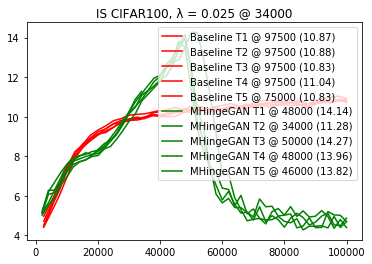

In [15]:
# Plot IS for ICML supplemental material multiple runs charts
 
plt.figure()
maxes = []
max_times = []
for i in range(len(mydirs_)):
#     t, IS = list(zip(*[(k, v['IS'][0]) for (k, v) in hists[i].items()]))
    
    def safe_IS(v):
        if 'IS' in v:
            return v['IS'][0]
        else:
            return 0
    
    t, IS = list(zip(*sorted([(k, safe_IS(v)) for (k, v) in hists[i].items()])))
    npIS = np.array(IS)
    npt = np.array(t)
    t_limit = 100000
    if i == 6:
        t_limit = 34000
    IS = npIS[npt <= t_limit]
    t = npt[npt <= t_limit]
    
    best_time = t[np.argmax(IS)]
    print('%s @ %i' % (mydirs_[i],best_time))
    print(hists[i][best_time])
    
    max_times.append(best_time)
    maxes.append(IS[np.argmax(IS)])

    t_, IS_ = no_zeros(t,IS)
    mycolor = 'red' if i < 5 else 'green'
    plt.plot(t_,IS_, mycolor) #, '-o'
legend = mynames_
#legend = ["BigGAN", "My Loss trial 1", "My Loss trial 2"]
plt.legend(["%s @ %i (%.2f)" % (s, max_times[i], maxes[i]) for i,s in enumerate(legend)])
plt.title('IS CIFAR100, λ = 0.025 @ 34000')

In [56]:
# Plot FID for ICML supplemental material multiple runs charts

plt.figure()
maxes = []
max_times = []
for i in range(len(mydirs_)):
#     t, IS = list(zip(*[(k, v['IS'][0]) for (k, v) in hists[i].items()]))
    
    def safe_IS(v):
        if 'FID' in v:
            val = v['FID']
            if val > 0 and val < 1000:
                return val
            else:
                return 0
        else:
            return 0
    npIS = np.array(IS)
    t, IS = list(zip(*sorted([(k, safe_IS(v)) for (k, v) in hists[i].items()])))
    npIS = np.array(IS)
    npt = np.array(t)
    t_limit = 100000
    if i == 6:
        t_limit = 34000
    IS = npIS[npt <= t_limit]
    t = npt[npt <= t_limit]
    t_, IS_ = no_zeros(t,IS)
    
    best_time = t_[np.argmin(IS_)]
    print('%s @ %i' % (mydirs_[i],best_time))
    print(hists[i][best_time])
    
    max_times.append(best_time)
    maxes.append(IS_[np.argmin(IS_)])
    
    
    mycolor = 'red' if i < 5 else 'green'
    plt.plot(t_, IS_, mycolor) #, '-o'
legend = mynames_
#legend = ["BigGAN", "My Loss trial 1", "My Loss trial 2"]
plt.legend(["%s @ %i (%.4f)" % (s, max_times[i], maxes[i]) for i,s in enumerate(legend)])
plt.title('FID CIFAR100, λ = 0.025 @ 34000')

/scratch0/ilya/locDoc/miniconda2/envs/venvcuda10/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


FigureCanvasNbAgg()

cifar100_baseline_redo_feb1 @ 95000
{'IS': [10.69425, 0.2117463], 'FID': 10.207756774670315}
cifar100_baseline_redo_feb2 @ 77500
{'IS': [10.57014, 0.06856316], 'FID': 10.377613150700654}
cifar100_baseline_redo_feb3 @ 100000
{'IS': [10.798991, 0.18519102], 'FID': 10.239701950528001}
cifar100_baseline_redo_feb4 @ 95000
{'IS': [10.998212, 0.14290628], 'FID': 9.991211436724143}
cifar100_baseline_redo_feb5 @ 97500
{'IS': [10.798391, 0.09116938], 'FID': 9.693693168705693}
c100_mh_p05_redo_feb2_ctd_c @ 46000
{'IS': [12.560494, 0.17132449], 'FID': 12.4754239101635}
c100_mh_p05_redo_feb2 @ 34000
{'IS': [11.27719, 0.22163828], 'FID': 15.476205254242302}


Text(0.5, 1.0, 'FID CIFAR100, λ = 0.025 @ 34000')

In [89]:
plt.close('all')

In [15]:
HIST_FNAME = 'scoring_hist.npy'

mydirs_ = mydirs.split(' ')
full_paths = [os.path.join(outf, d) for d in mydirs_]
hists = [load_or_make_hist(d) for d in full_paths]

In [16]:
# Plot IS

plt.figure()
maxes = []
max_times = []
for i in range(len(mydirs_)):
#     t, IS = list(zip(*[(k, v['IS'][0]) for (k, v) in hists[i].items()]))
    
    def safe_IS(v):
        if 'IS' in v:
            return v['IS'][0]
        else:
            return 0
    
    t, IS = list(zip(*sorted([(k, safe_IS(v)) for (k, v) in hists[i].items()])))
    npIS = np.array(IS)
    npt = np.array(t)
    IS = npIS[npt <= 200000]
    t = npt[npt <= 200000]
    
    best_time = t[np.argmax(IS)]
    print('%s @ %i' % (mydirs_[i],best_time))
    print(hists[i][best_time])
    
    max_times.append(best_time)
    maxes.append(IS[np.argmax(IS)])

    t_, IS_ = no_zeros(t,IS)
    plt.plot(t_,IS_) #, '-o'
legend = mydirs_
#legend = ["BigGAN", "My Loss trial 1", "My Loss trial 2"]
plt.legend(["%s @ %i (%.2f)" % (s, max_times[i], maxes[i]) for i,s in enumerate(legend)])
plt.title('IS')

FigureCanvasNbAgg()

baseline_redo_feb1 @ 67500
{'IS': [9.08104, 0.1001138], 'FID': 8.644954497162814}
baseline_redo_feb2 @ 100000
{'IS': [9.000514, 0.1598081], 'FID': 8.612518554772294}
baseline_redo_feb3 @ 92500
{'IS': [9.0841675, 0.1285564], 'FID': 7.924650647583519}
baseline_redo_feb4 @ 97500
{'IS': [9.033888, 0.16738516], 'FID': 7.984685824713722}


Text(0.5, 1.0, 'IS')

In [40]:
# Plot Test FID

plt.figure()
maxes = []
max_times = []
for i in range(len(mydirs_)):
#     t, IS = list(zip(*[(k, v['IS'][0]) for (k, v) in hists[i].items()]))
    
    def safe_IS(v):
        if 'FID' in v:
            return v['FID']
        else:
            return 0
    npIS = np.array(IS)
    t, IS = list(zip(*sorted([(k, safe_IS(v)) for (k, v) in hists[i].items()])))
    npIS = np.array(IS)
    npt = np.array(t)
    IS = npIS[npt <= 200000]
    t = npt[npt <= 200000]
    
    best_time = t[np.argmin(IS)]
    print('%s @ %i' % (mydirs_[i],best_time))
    print(hists[i][best_time])
    
    max_times.append(best_time)
    maxes.append(IS[np.argmin(IS)])
    
    t_, IS_ = no_zeros(t,IS)
    plt.plot(t_, IS_) #, '-o'
legend = mydirs_
#legend = ["BigGAN", "My Loss trial 1", "My Loss trial 2"]
plt.legend(["%s @ %i (%.4f)" % (s, max_times[i], maxes[i]) for i,s in enumerate(legend)])
plt.title('FID')

FigureCanvasNbAgg()

cifar100_fm_and_cs_p05 @ 44000
{'IS': [12.598786, 0.16117056], 'Test': 0.557, 'Self': 0.5369, 'Train': 0.9799, 'Generator': 0.8353, 'Mean_Label': array([0.0095, 0.0082, 0.0124, 0.0113, 0.0079, 0.0101, 0.0098, 0.0106,
       0.0121, 0.0046, 0.0148, 0.0098, 0.0098, 0.0085, 0.0165, 0.0077,
       0.0105, 0.0087, 0.007 , 0.0127, 0.0069, 0.0096, 0.0111, 0.0099,
       0.0097, 0.012 , 0.0119, 0.013 , 0.0092, 0.0145, 0.0107, 0.013 ,
       0.0148, 0.0088, 0.0098, 0.0065, 0.0083, 0.0083, 0.0112, 0.0047,
       0.0059, 0.009 , 0.0139, 0.008 , 0.0136, 0.0091, 0.0156, 0.01  ,
       0.0122, 0.01  , 0.0042, 0.0115, 0.0102, 0.0112, 0.0084, 0.0024,
       0.0105, 0.0082, 0.0086, 0.0076, 0.0087, 0.0095, 0.0096, 0.0128,
       0.0099, 0.0117, 0.0074, 0.0116, 0.008 , 0.0106, 0.0111, 0.0113,
       0.0078, 0.0089, 0.0151, 0.0113, 0.0093, 0.0074, 0.0115, 0.0128,
       0.0069, 0.0089, 0.0056, 0.0087, 0.0118, 0.0142, 0.01  , 0.0098,
       0.0098, 0.0083, 0.0103, 0.0066, 0.0106, 0.0107, 0.0138, 0.016 ,
  

Text(0.5, 1.0, 'FID')

In [530]:
# STL 48 merge series of experiment that was split

outf = "/scratch0/ilya/locDoc/BigGAN/stl"

t_base, is_base, fid_base = dir_to_series("mh_48px_baseline")
t_b, is_b, fid_b = dir_to_series("mh_48px_fmloss")

t_a, is_a, fid_a = dir_to_series("mhs_p05_48px")

In [ ]:
# STL 32 merge series of experiment that was split

t_fm, is_fm, acc_fm = dir_to_series("stl32_with_fmloss")
t_1, is_1, acc_1 = dir_to_series("stl32_with_unlab")
t_2, is_2, acc_2 = dir_to_series("stl32_with_unlab_improve_1step")

t_b = np.concatenate([t_1[:9], t_2])
is_b = np.concatenate([is_1[:9], is_2])
acc_b = np.concatenate([acc_1[:9], acc_2])

In [522]:
# CIFAR10 merge series of experiment that was split
outf = "/scratch0/ilya/locDoc/BigGAN/cifartest"

t_base, is_base, fid_base = dir_to_series("default")
t_1, is_1, fid_1 = dir_to_series("mh_loss_noconcat_gap")
t_2, is_2, fid_2 = dir_to_series("mh_loss_noconcat_gap_phase2_4")

t_b = np.concatenate([t_1[:9], t_2])
is_b = np.concatenate([is_1[:9], is_2])
fid_b = np.concatenate([fid_1[:9], fid_2])

t_a, is_a, fid_a = dir_to_series("mhs_p05")

In [527]:
# for cifar100
outf = "/scratch0/ilya/locDoc/BigGAN/cifartest"


t_base, is_base, fid_base = dir_to_series("cifar100_baseline_redo")
t_b, is_b, fid_b = dir_to_series("cifar100_mh")
t_a, is_a, fid_a = dir_to_series("cifar100_fm_and_cs_p05")

In [533]:
#IS plot

fig, ax1 = plt.subplots()

t_base_, is_base_ = no_zeros(t_base, is_base)
plt.plot(t_base_,is_base_)

t_b_, is_b_ = no_zeros(t_b, is_b)
plt.plot(t_b_,is_b_)

t_a_, is_a_ = no_zeros(t_a, is_a)
plt.plot(t_a_,is_a_)

ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linestyle='dashed')
#plt.ylim([0.0,1.1])
plt.legend(['Baseline', 'MHingeGAN FM', 'MHingeGAN'])
plt.xticks(np.array([0,2,4,6,8,10])*10000, [0,2,4,6,8,10])
plt.xlabel('itrs 1e4')
plt.ylabel('Inception Score')

FigureCanvasNbAgg()

Text(0,0.5,'Inception Score')

In [534]:
#FID plot

fig, ax1 = plt.subplots()

t_base_, fid_base_ = no_zeros(t_base, fid_base)
plt.plot(t_base_,fid_base_)

t_b_, fid_b_ = no_zeros(t_b, fid_b)
plt.plot(t_b_,fid_b_)

t_a_, fid_a_ = no_zeros(t_a, fid_a)
plt.plot(t_a_,fid_a_)

ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linestyle='dashed')
plt.ylim([0.0,50])
plt.legend(['Baseline', 'MHingeGAN FM', 'MHingeGAN'])
plt.xticks(np.array([0,2,4,6,8,10])*10000, [0,2,4,6,8,10])
plt.xlabel('itrs 1e4')
plt.ylabel('FID')

FigureCanvasNbAgg()

Text(0,0.5,'FID')

In [555]:
# CIFAR10 merge series of experiment that was split, 4 ACCURACIES
outf = "/scratch0/ilya/locDoc/BigGAN/cifartest"

t_base, tr_base, te_base, s_base, g_base = dir_to_acc_series("default")
t_1, tr_1, te_1, s_1, g_1 = dir_to_acc_series("mh_loss_noconcat_gap")
t_2, tr_2, te_2, s_2, g_2 = dir_to_acc_series("mh_loss_noconcat_gap_phase2_4")

t_b = np.concatenate([t_1[:9], t_2])
tr_b = np.concatenate([tr_1[:9], tr_2])
te_b = np.concatenate([te_1[:9], te_2])
s_b = np.concatenate([s_1[:9], s_2])
g_b = np.concatenate([g_1[:9], g_2])

t_b, tr_b, te_b, s_b, g_b = dir_to_acc_series("mhs_p05")

In [325]:
# CIFAR10 have them all end at the same time after collapse
te_b[69:] = 0.0

In [18]:
# STL 32 merge series of experiment that was split, 4 ACCURACIES

t_1, tr_1, te_1, s_1, g_1 = dir_to_acc_series("stl32_with_unlab")
t_2, tr_2, te_2, s_2, g_2 = dir_to_acc_series("stl32_with_unlab_improve_1step")

t_b = np.concatenate([t_1[:9], t_2])
tr_b = np.concatenate([tr_1[:9], tr_2])
te_b = np.concatenate([te_1[:9], te_2])
s_b = np.concatenate([s_1[:9], s_2])
g_b = np.concatenate([g_1[:9], g_2])

In [346]:
# STL 48, 4 ACCURACIES

#t_base, tr_base, te_base, s_base, g_base = dir_to_acc_series("mh_48px_baseline")
t_b, tr_b, te_b, s_b, g_b = dir_to_acc_series("mhs_p05_48px")
t_b, tr_b, te_b, s_b, g_b = dir_to_acc_series("mh_48px_fmloss")



In [52]:
# CIFAR 100, 4 ACCURACIES
outf = "/fs/vulcan-scratch/ilyak/locDoc/experiments/cifar100"

t_base, tr_base, te_base, s_base, g_base = dir_to_acc_series("cifar100_fm_and_cs_p05") # cifar100_fm_and_cs_p01
#t_b, tr_b, te_b, s_b, g_b = dir_to_acc_series("cifar100_mh")
#t_b, tr_b, te_b, s_b, g_b = dir_to_acc_series("cifar100_fmloss")
t_b, tr_b, te_b, s_b, g_b = dir_to_acc_series("cifar100_fm_and_cs_p01")
#t_b, tr_b, te_b, s_b, g_b = dir_to_acc_series("cifar100_fm_and_cs_p01")


In [96]:
# Tiny imagenet 64, 4 ACCURACIES

mydirs = "tih_mhinge_p05_2step tih50k_mhinge_p025_2step"
# mydirs = "mhinge_p1 mhinge_p1_2step"
# mydirs = "tih_mhinge_p05_2step tih50k_mhinge_p025_2step tih50k_mhinge_p05_2step_Dlr2" 
outf = "/fs/vulcan-scratch/ilyak/locDoc/experiments/TinyImagenet_100k"

#t_base, tr_base, te_base, s_base, g_base = dir_to_acc_series("tih_mhinge_p05_2step")
t_base, tr_base, te_base, s_base, g_base = dir_tpo_acc_series_jsonl("tih_mhinge_p05_2step",2)
#t_b, tr_b, te_b, s_b, g_b = dir_to_acc_series("cifar100_mh")
#t_b, tr_b, te_b, s_b, g_b = dir_to_acc_series("mhinge_p1_2step")
t_b, tr_b, te_b, s_b, g_b = dir_tpo_acc_series_jsonl("mhinge_p1_2step_ctd")



In [97]:
fig, ax1 = plt.subplots()

t_b_, tr_b_ = no_zeros(t_b, tr_b)
plt.plot(t_b_,tr_b_)

t_b_, te_b_ = no_zeros(t_b, te_b)
plt.plot(t_b_,te_b_)

t_b_, s_b_ = no_zeros(t_b, s_b)
plt.plot(t_b_,s_b_)

t_b_, g_b_ = no_zeros(t_b, g_b)
plt.plot(t_b_,g_b_)

ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linestyle='dashed')
plt.ylim([0.0,1.1])
plt.legend(['Train', 'Test', 'Self', 'Generator'])
plt.xlim([0.0,100000])
plt.xticks(np.array([0,2,4,6,8,10])*10000, [0,2,4,6,8,10])
#plt.xticks(np.array([0,2,4,6,8,10,12,14,16,18,20])*10000, [0,2,4,6,8,10,12,14,16,18,20])
plt.xlabel('itrs 1e4')
plt.ylabel('Class Accuracy')
plt.title('Class Conditioning in C&G in MHingeGAN (tih50k_128px_mhinge_p05_2step)')

FigureCanvasNbAgg()

Text(0.5, 1.0, 'Class Conditioning in C&G in MHingeGAN (tih50k_128px_mhinge_p05_2step)')

In [63]:
fig, ax1 = plt.subplots()

t_base_, tr_base_ = no_zeros(t_base, tr_base)
plt.plot(t_base_,tr_base_)

t_base_, te_base_ = no_zeros(t_base, te_base)
plt.plot(t_base_,te_base_)

t_base_, s_base_ = no_zeros(t_base, s_base)
plt.plot(t_base_,s_base_)

t_base_, g_base_ = no_zeros(t_base, g_base)
plt.plot(t_base_,g_base_)

ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linestyle='dashed')
plt.ylim([0.0,1.1])
plt.legend(['Train', 'Test', 'Self', 'Generator'])
plt.xticks(np.array([0,2,4,6,8,10])*10000, [0,2,4,6,8,10])
plt.xlabel('itrs 1e4')
plt.ylabel('Class Accuracy')

plt.title('Class Conditioning in D&G (tih_mhinge_p05_2step)')

FigureCanvasNbAgg()

Text(0.5, 1.0, 'Class Conditioning in D&G (tih_mhinge_p05_2step)')

In [557]:
# CIFAR10 classes
outf = "/scratch0/ilya/locDoc/BigGAN/cifartest"


t_base, classes_base = dir_to_mean_label_series("default")
t_1, classes_1 = dir_to_mean_label_series("mh_loss_noconcat_gap")
t_2, classes_2 = dir_to_mean_label_series("mh_loss_noconcat_gap_phase2_4")

t_b = np.concatenate([t_1[:9], t_2])
classes_b = np.concatenate([classes_1[:9], classes_2])


t_a, classes_a = dir_to_mean_label_series("mhs_p05")



In [560]:
# CIFAR100 classes


t_base, classes_base = dir_to_mean_label_series("cifar100_baseline_redo", nclass=100)
t_b, classes_b = dir_to_mean_label_series("cifar100_mh", nclass=100)
t_a, classes_a = dir_to_mean_label_series("cifar100_fm_and_cs_p05", nclass=100)



In [451]:
# STL 48 classes

outf = "/scratch0/ilya/locDoc/BigGAN/stl"

t_base, classes_base = dir_to_mean_label_series("mh_48px_baseline")
t_b, classes_b = dir_to_mean_label_series("mh_48px_fmloss")
t_a, classes_a = dir_to_mean_label_series("mhs_p05_48px")


In [561]:
# std dev plot

fig, ax1 = plt.subplots()

std_base = classes_base.std(axis=1)
t_base_, std_base_ = no_zeros(t_base, std_base)
plt.plot(t_base_, std_base_)

std_b = classes_b.std(axis=1)
t_b_, std_b_ = no_zeros(t_b, std_b)
plt.plot(t_b_, std_b_)

std_a = classes_a.std(axis=1)
t_a_, std_a_ = no_zeros(t_a, std_a)
plt.plot(t_a_, std_a_)

plt.legend(['Baseline', 'MHingeGAN CSC', 'MHingeGAN'])
#plt.title('OLD CIFAR10 Generator Class Prevalence Std Dev')

FigureCanvasNbAgg()

In [233]:
# prevalence plot
fig, ax1 = plt.subplots()

for k in range(10):
    prevalence = [class_vec[k] for class_vec in classes_base]
    t_base_, prevalence_ = no_zeros(t_base, prevalence)
    plt.plot(t_base_, prevalence_)
#plt.yticks(np.arange(0.0, 0.05,0.01))
#plt.ylim([0.0,0.05])

plt.ylim([0.0,0.2])
plt.yticks(np.arange(0.0, 0.2,0.01))

#plt.legend(['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
# 'airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck'
plt.title('CIFAR10 Baseline Generator Class Prevalence')

FigureCanvasNbAgg()

Text(0.5,1,'CIFAR10 Baseline Generator Class Prevalence')

In [479]:
# prevalence plot
fig, ax1 = plt.subplots()

for k in range(10):
    prevalence = [class_vec[k] for class_vec in classes_b]
    t_b_, prevalence_ = no_zeros(t_b, prevalence)
    plt.plot(t_b_, prevalence_)
# plt.yticks(np.arange(0.0, 0.05,0.01))
# plt.ylim([0.0,0.05])

plt.ylim([0.0,0.2])
plt.yticks(np.arange(0.0, 0.2,0.01))

plt.legend(['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
plt.title('CIFAR10 MHingeGAN Generator Class Prevalence')

FigureCanvasNbAgg()

Text(0.5,1,'CIFAR10 MHingeGAN Generator Class Prevalence')

In [721]:
# Two axis IS and acc plot CIFAR

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Test Accuracy', color=color)

t_base_, acc_base_ = no_zeros(t_base, acc_base)
ax1.plot(t_base_, acc_base_, linestyle='dashed', color=color)
#ax1.plot(t_1, acc_1, color=color)
t_b_, acc_b_ = no_zeros(t_b, acc_b)
ax1.plot(t_b_, acc_b_, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Train Acc', color=color)  # we already handled the x-label with ax1
t_base_, acctr_base_ = no_zeros(t_base, acctr_base)
ax2.plot(t_base_, acctr_base_, linestyle='dashed', color=color)
#ax2.plot(t_1, is_1, color=color)
t_b_, acctr_b_ = no_zeros(t_b, acctr_b)
ax2.plot(t_b_, acctr_b_, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.legend(['Baseline', 'MHinge'])
plt.title('CIFAR10 IS and Test Acc')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

FigureCanvasNbAgg()

In [605]:
# Two axis IS and acc plot STL 32

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Test Accuracy', color=color)

t_fm_, acc_fm_ = no_zeros(t_fm, acc_fm)
ax1.plot(t_fm_, acc_fm_, color=color)
#ax1.plot(t_1, acc_1, color=color)
ax1.plot(t_b, acc_b, linestyle='dashed', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Inception Score', color=color)  # we already handled the x-label with ax1
t_fm_, is_fm_ = no_zeros(t_fm, is_fm)
ax2.plot(t_fm_, is_fm_, color=color)
#ax2.plot(t_1, is_1, color=color)
t_b_, is_b_ = no_zeros(t_b, is_b)
ax2.plot(t_b_, is_b_, linestyle='dashed', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.legend(['With FM', 'Without FM'])
plt.title('STL 32x32, IS and Test Acc with and without FM Loss')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

FigureCanvasNbAgg()

In [640]:
# Two axis IS and acc plot CIFAR

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Test Accuracy', color=color)

t_base_, acc_base_ = no_zeros(t_base, acc_base)
ax1.plot(t_base_, acc_base_, linestyle='dashed', color=color)
#ax1.plot(t_1, acc_1, color=color)
t_b_, acc_b_ = no_zeros(t_b, acc_b)
ax1.plot(t_b_, acc_b_, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Inception Score', color=color)  # we already handled the x-label with ax1
t_base_, is_base_ = no_zeros(t_base, is_base)
ax2.plot(t_base_, is_base_, linestyle='dashed', color=color)
#ax2.plot(t_1, is_1, color=color)
t_b_, is_b_ = no_zeros(t_b, is_b)
ax2.plot(t_b_, is_b_, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.legend(['Baseline', 'MHinge'])
plt.title('CIFAR10 IS and Test Acc')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

FigureCanvasNbAgg()